In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/data_cleaned.csv')

In [3]:
y = df['status']
X = df.drop(['status'], axis = 1)

# lets print the shapes of these newly formed data sets
print("Shape of the x :", X.shape)
print("Shape of the y :", y.shape)

Shape of the x : (215, 13)
Shape of the y : (215,)


In [4]:
cols = [ 
    'ssc_p',
    'hsc_p',
    'degree_p',
    'etest_p',
    'mba_p',
    'salary'
]
X[cols]

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0
3,56.00,52.00,52.00,66.0,59.43,265000.0
4,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.0
211,58.00,60.00,72.00,74.0,53.62,275000.0
212,67.00,67.00,73.00,59.0,69.72,295000.0
213,74.00,66.00,58.00,70.0,60.23,204000.0


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[cols] =  sc.fit_transform(X[cols])
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,0,-0.028087,1,2.268812,0,1,-1.140102,2,0,-1.291091,1,-0.597647,-0.144570
1,0,1.113369,0,1.103448,0,2,1.513267,2,1,1.087157,2,0.687620,-1.041427
2,0,-0.213238,0,0.153313,1,3,-0.322843,3,0,0.218908,2,-0.769474,-0.400815
3,0,-1.046417,0,-1.318339,1,2,-1.957362,2,0,-0.460592,1,-0.489396,-0.208631
4,0,1.712332,0,0.668391,1,1,0.943909,3,0,1.864806,2,-1.164676,1.841328


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
# lets print the shapes again 
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (172, 13)
Shape of the y Train : (172,)
Shape of the X test : (43, 13)
Shape of the y test : (43,)


In [8]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

Training Accuracy : 1.0
Testing Accuracy : 1.0


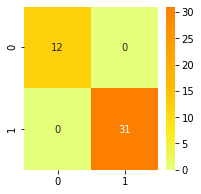

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        31

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)

y_pred = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred)
print(cr)

In [24]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [26]:
feature=[0,62.00,0,58.00,0,2,53.00,3,0,89.0,1,60.22,265000.0]
ml_model = rf.predict([feature])

if ml_model == 1:
    print("Placed")
else:
    print("Not Placed")


Placed
